# Credit Card Default Prediction Project

## Overview

This research aimed at the case of customers default payments and compares the predictive accuracy of probability of default. Dataset was constructed by both API calls and kaggle dataset. The research is studied as a classification machine learning problem with a binary variable, default payment as the response variable, and 23 explanatory features as predictor variables.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.options.display.max_columns = 100
import pickle

## Data Understanding

### Data Collection by API
https://www.fraudlabspro.com/developer \
A small amout of data is collected to show how is the API call being used in our research.

In [2]:
from order import Order

f = open('api.json')
api_key = json.load(f)

df_order = pd.DataFrame()

for i in range(5):
    d = { 'key': api_key,
          'ip': '19{}.112.62.101'.format(i)}

    result = json.loads(Order.validate(d))
    df_order = pd.concat([df_order, pd.DataFrame(result, index=[0])])
    time.sleep(0.1)

In [3]:
df_order

,is_country_match,is_high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,ip_timezone,ip_elevation,ip_domain,ip_mobile_mnc,ip_mobile_mcc,ip_mobile_brand,ip_netspeed,ip_isp_name,ip_usage_type,is_free_email,is_new_domain_name,is_domain_exists,is_proxy_ip_address,is_bin_found,is_bin_country_match,is_bin_name_match,is_bin_phone_match,is_bin_prepaid,is_address_ship_forward,is_bill_ship_city_match,is_bill_ship_state_match,is_bill_ship_country_match,is_bill_ship_postal_match,is_ship_address_blacklist,is_phone_blacklist,is_ip_blacklist,is_email_blacklist,is_credit_card_blacklist,is_device_blacklist,is_user_blacklist,is_high_risk_username,is_export_controlled_country,is_malware_exploit,user_order_id,user_order_memo,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NA,N,-,-,AR,South America,Cordoba,Las Varillas,-31.87208,-62.71946,-03:00,138,lasvarinet.com.ar,NA,NA,NA,DSL,Coop. Energia Elect. Y Otros Servicios Las Var...,Fixed Line ISP,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,,,100,0,APPROVE,20210108-ON7BUY,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,CL,South America,Region Metropolitana de Santiago,Santiago,-33.42628,-70.56656,-04:00,663,telefonicachile.cl,NA,NA,NA,DSL,Telefonica Chile S.A.,Mobile ISP,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,,,100,0,APPROVE,20210108-P2KPBS,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,US,North America,California,Tustin,33.73617,-117.82073,-08:00,42,storageconceptsinc.com,NA,NA,NA,COMP,Storage Concepts Inc.,Commercial,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,,,100,0,APPROVE,20210108-6FTFOX,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,CN,Asia,Beijing,Beijing,39.9075,116.39723,+08:00,49,tencent.com,NA,NA,NA,T1,Tencent Cloud Computing (Beijing) Co. Ltd,Data Center/Web Hosting/Transit,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,,,100,0,APPROVE,20210108-ZGNJAM,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,GB,Europe,England,London,51.50853,-0.12574,+00:00,13,claranet.co.uk,NA,NA,NA,T1,Claranet Limited,Data Center/Web Hosting/Transit,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,,,100,0,APPROVE,20210108-MFZKJN,1.5.1,208,INVALID QUANTITY VALUE,498,NA


### Exploratory Data Analysis
This step is to understand the information contained within the data. Become familiar with the data. Data visualizations is created to determine if there are any relationships between the features and the target variables. Look to see if there are any extreme values.

In [4]:
df = pd.read_excel('data/default_of_credit_card_clients.xls', header=1)

In [5]:
df.rename(columns={'default payment next month': 'Class'}, inplace=True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Class
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Class'],
      dtype='object')

In [8]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',       
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']  

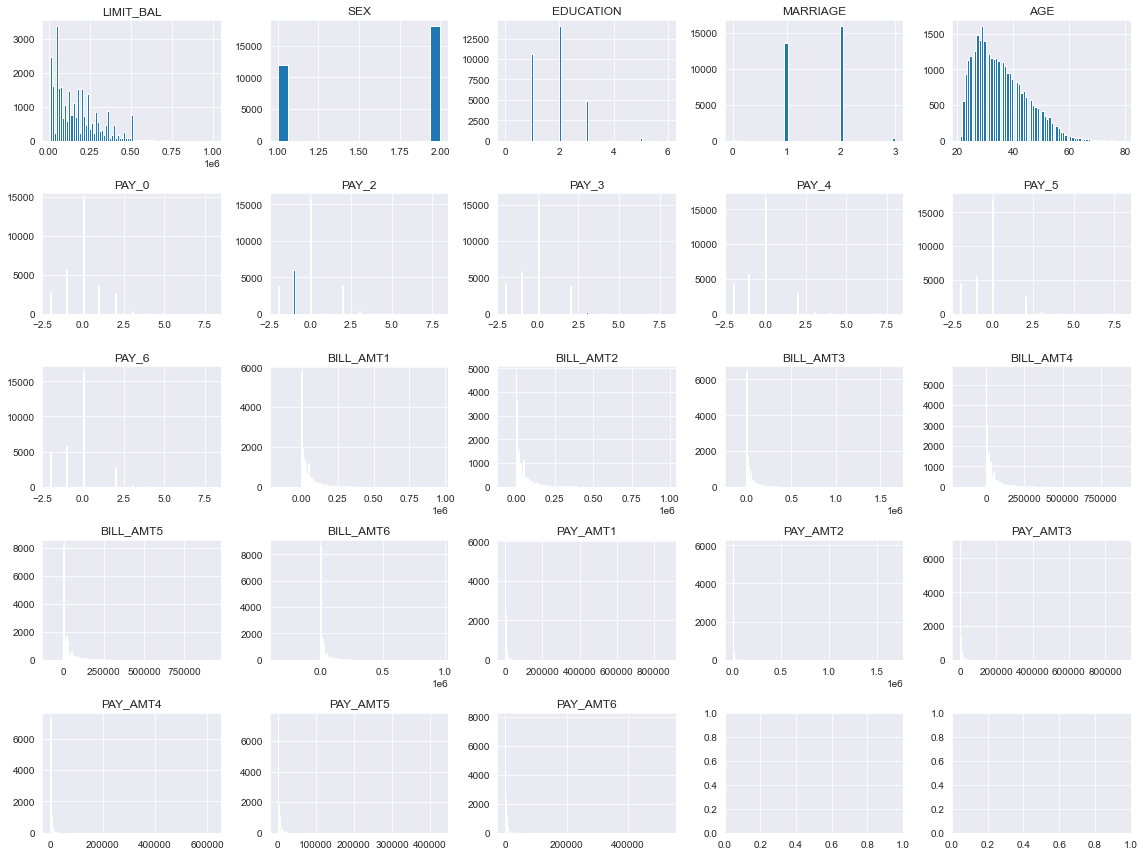

In [9]:
fig, axes = plt.subplots(5,5, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    ax.hist(df[c], bins='auto')
    ax.set_title(c)
plt.tight_layout()

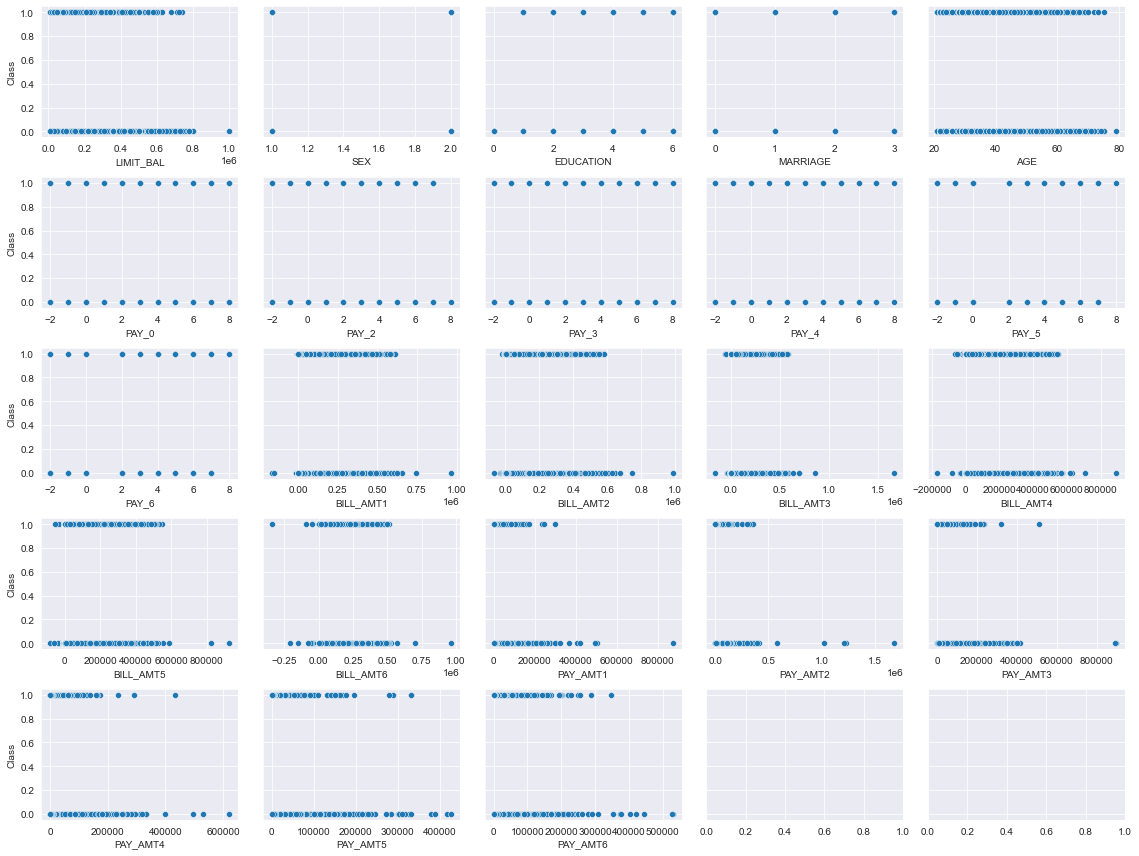

In [10]:
fig, axes = plt.subplots(5,5, sharey=True, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    sns.scatterplot(data=df, x=c, y='Class', ax=ax)
plt.tight_layout()
#plt.savefig('images/overall.jpg')

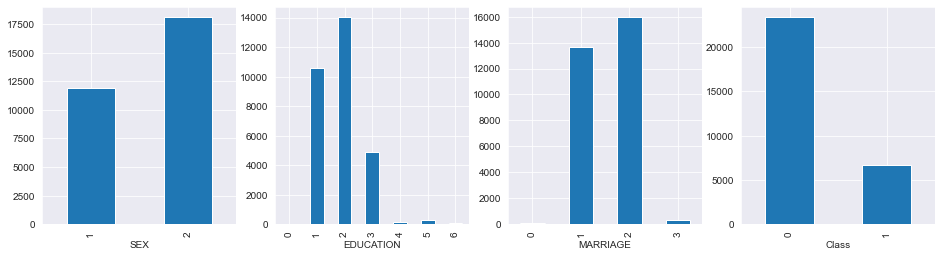

In [11]:
col = ['SEX', 'EDUCATION', 'MARRIAGE','Class']
fig, axes = plt.subplots(1,4, figsize=(16,4))
for ax, c in zip(axes.flat, col):
    df.groupby([c]).size().plot.bar(ax=ax)
#plt.savefig('images/groupby.jpg')

### Feature Engineering

#### Sex
one hot encoding

In [12]:
df.groupby(['SEX']).LIMIT_BAL.count().sort_values()

SEX
1    11888
2    18112
Name: LIMIT_BAL, dtype: int64

In [13]:
sex = pd.get_dummies(df['SEX'], prefix='sex', drop_first=True)

#### Education 
We can check what the count is for each group and get the dummies.

In [14]:
df.groupby(['EDUCATION']).LIMIT_BAL.count().sort_values()

EDUCATION
0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: LIMIT_BAL, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

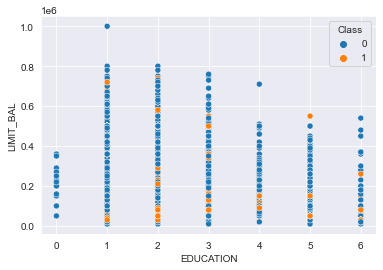

In [15]:
sns.scatterplot(data=df, x='EDUCATION', y='LIMIT_BAL', hue='Class')

In [16]:
# Categorize the education levels, compare all categories
education = pd.get_dummies(df['EDUCATION'], prefix='EDU', drop_first=True)

#### MARRIAGE
We do the same for marriage status, dummy the columns.

In [17]:
df.groupby(['MARRIAGE']).LIMIT_BAL.count().sort_values()

MARRIAGE
0       54
3      323
1    13659
2    15964
Name: LIMIT_BAL, dtype: int64

In [18]:
marriage = pd.get_dummies(df['MARRIAGE'], prefix='MAR', drop_first=True)

#### LIMIT_BAL
Statistical test

In [19]:
from scipy import stats

In [20]:
default = df[df['Class'] == 1]
not_default = df[df['Class'] == 0]

stats.ttest_ind(default.LIMIT_BAL, not_default.LIMIT_BAL, equal_var=False)

Ttest_indResult(statistic=-28.951587933509845, pvalue=3.3641002455114717e-178)

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

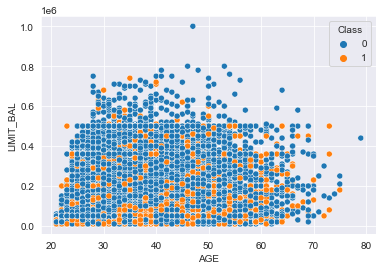

In [21]:
sns.scatterplot(data=df, x='AGE', y='LIMIT_BAL', hue='Class')

#### Bill & Payment

If in any given month the payment is on time, the month has a -1. Let's sum up all of the value accross the data frame as a measure of delinquency

In [22]:
pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [23]:
# sum the payments accross the columns
df['delinquency'] = df[pay].sum(axis=1)

# Statistical test
stats.ttest_ind(df[df['Class']==1].delinquency, df[df['Class']==0].delinquency, equal_var=False)

Ttest_indResult(statistic=41.14965018562675, pvalue=0.0)

<AxesSubplot:xlabel='delinquency', ylabel='Count'>

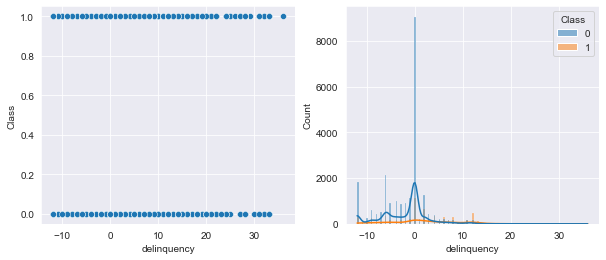

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(data=df, x='delinquency', y='Class', ax=ax[0])
sns.histplot(data=df, x='delinquency', hue='Class', kde=True, ax=ax[1])
#plt.savefig('images/deliquency.jpg')

In [25]:
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payment = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df['bill'] = df[bill].sum(axis=1)
df['payment'] = df[payment].sum(axis=1)
df['balance'] = df.LIMIT_BAL-df['bill']+df['payment']

# Credit Utilization Rate
df['rate'] = df['bill']/df.LIMIT_BAL

# credit utility
df['utility'] = df['balance']/df.LIMIT_BAL

<AxesSubplot:title={'center':'defaulting'}, xlabel='balance', ylabel='Count'>

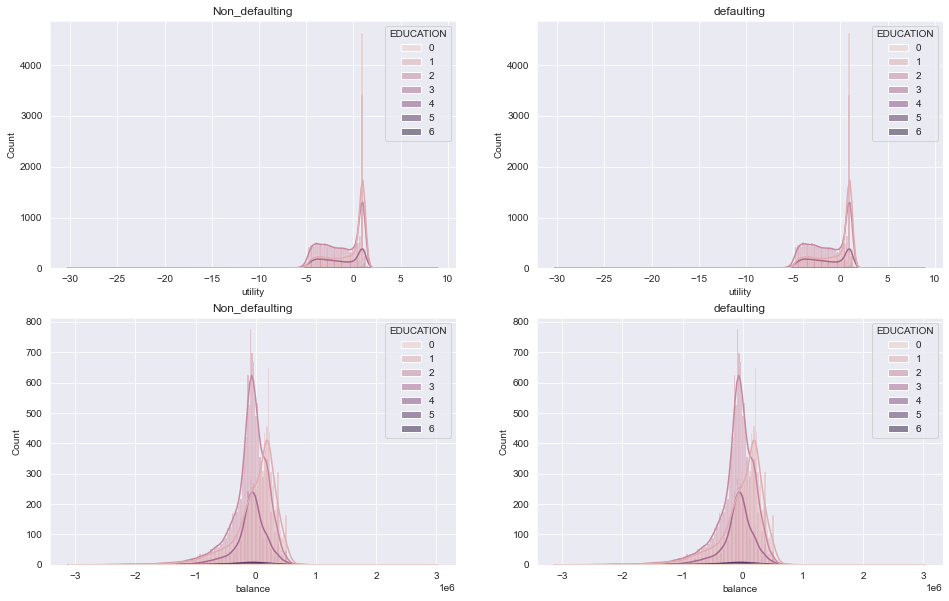

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))
sns.color_palette("hls", 8)

ax[0][0].set_title('Non_defaulting')
sns.histplot(data=df[df['Class'] == 0], x=df['utility'], hue=df['EDUCATION'],kde=True, ax=ax[0][0])

ax[0][1].set_title('defaulting')
sns.histplot(data=df[df['Class'] == 1], x=df['utility'], hue=df['EDUCATION'],kde=True, ax=ax[0][1])

ax[1][0].set_title('Non_defaulting')
sns.histplot(data=df[df['Class'] == 0], x=df['balance'], hue=df['EDUCATION'],kde=True, ax=ax[1][0])

ax[1][1].set_title('defaulting')
sns.histplot(data=df[df['Class'] == 1], x=df['balance'], hue=df['EDUCATION'],kde=True, ax=ax[1][1])
#plt.savefig('images/utility.jpg')

#### Descriptive Statistics

In [28]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Class', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility'] 

In [29]:
df[col].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Class,delinquency,bill,payment,balance,rate,utility
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.221200,-1.094633,2.698617e+05,3.165139e+04,-7.072596e+04,2.238288,-1.004836
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.415062,5.893055,3.795643e+05,6.082768e+04,3.529022e+05,2.111340,2.046369
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,-12.000000,-3.362590e+05,0.000000e+00,-3.116080e+06,-1.395540,-30.221350
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-5.000000,2.868800e+04,6.679750e+03,-1.926050e+05,0.179982,-2.823445
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,1.263110e+05,1.438300e+04,-2.809600e+04,1.709004,-0.421490
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,3.426265e+05,3.350350e+04,1.604378e+05,4.127575,0.971966
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,36.000000,5.263883e+06,3.764066e+06,3.011514e+06,32.185850,8.857394


In [30]:
df = pd.concat([df, sex, education, marriage], axis=1)

## Modeling Fitting & Evaluation

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc, roc_curve

### Data Split
one hot encoding

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
col = ['LIMIT_BAL', 'AGE', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility', 'sex_2', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 
          'EDU_6', 'MAR_1', 'MAR_2',  'MAR_3']

In [34]:
X = df[col]
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

### SMOTE and ADASYN
imbalance data problem

In [36]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [ ]:
# adasyn = ADASYN()
# X_train, y_train = adasyn.fit_sample(X_train, y_train)

### Logistic Regression

#### Pros

- Logistic Regression performs well when the dataset is linearly separable.
- Logistic Regression is less prone to over-fitting and not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative).

#### Cons

- Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable.
- Logistic Regression is strictly a classification method and it has lots of competition. (SVMs, Naive Bayes, Random Forests, kNN etc.)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
pipe = Pipeline([('ss', StandardScaler()), ('lr', LogisticRegression())])
                 
param_grid = {'lr__fit_intercept': [True, False],    
              'lr__C': [1e16],
              'lr__solver': ['lbfgs','liblinear','saga']}

grid_lr = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_lr.fit(X_train, y_train)

train_pred_lr = grid_lr.predict(X_train)
test_pred_lr = grid_lr.predict(X_test)

In [39]:
# metric evaluation
train_accu_lr = accuracy_score(y_train, train_pred_lr)
test_accu_lr = accuracy_score(y_test, test_pred_lr)
print('Training accuracy score: {}'.format(train_accu_lr))
print('Test accuracy score: {}'.format(test_accu_lr))

train_f1_lr = f1_score(y_train, train_pred_lr)
test_f1_lr = f1_score(y_test, test_pred_lr)
print('Training F1 score: {}'.format(train_f1_lr))
print('Test F1 score: {}'.format(test_f1_lr))

y_score = grid_lr.decision_function(X_test)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr_lr, tpr_lr)))
print('\n')
print(classification_report(y_test, test_pred_lr))

Training accuracy score: 0.8163248915778766
Test accuracy score: 0.8018333333333333
Training F1 score: 0.7880641275136688
Test F1 score: 0.3867973182052605
AUC: 0.6945434626507405


              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4687
           1       0.60      0.29      0.39      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.62      0.63      6000
weighted avg       0.78      0.80      0.77      6000



Text(0.5, 1.0, 'Receiver operating characteristic (ROC) Curve')

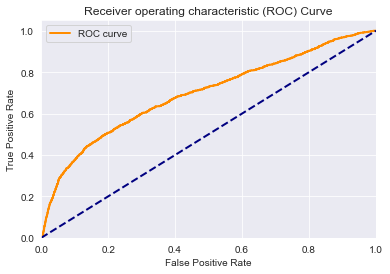

In [40]:
plt.plot(fpr_lr, tpr_lr, lw=2, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], c='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic (ROC) Curve')
#plt.savefig('images/roc.jpg')

### K-Nearest Neighbors

#### Pros

- K-NN is pretty intuitive and simple: K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.
- No Training Step: K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.

##### Cons

- K-NN is a slow algorithm: K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
- Curse of Dimensionality: KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
pipe = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier())])
                 
param_grid = {'knn__n_neighbors': [5, 10]}

grid_knn = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_knn.fit(X_train, y_train)

train_pred_knn = grid_knn.predict(X_train)
test_pred_knn = grid_knn.predict(X_test)

In [43]:
# metric evaluation
train_accu_knn = accuracy_score(y_train, train_pred_knn)
test_accu_knn = accuracy_score(y_test, test_pred_knn)
print('Training accuracy score: {}'.format(train_accu_knn))
print('Test accuracy score: {}'.format(test_accu_knn))

train_f1_knn = f1_score(y_train, train_pred_knn)
test_f1_knn = f1_score(y_test, test_pred_knn)
print('Training F1 score: {}'.format(train_f1_knn))
print('Test F1 score: {}'.format(test_f1_knn))

print(classification_report(y_test, test_pred_knn))

Training accuracy score: 0.8453980832039407
Test accuracy score: 0.7816666666666666
Training F1 score: 0.8319706712444355
Test F1 score: 0.40400363967242947
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4687
           1       0.50      0.34      0.40      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.62      0.64      6000
weighted avg       0.76      0.78      0.77      6000



### SVM

#### Pros

- SVM works relatively well when there is clear margin of separation between classes and SVM is more effective in high dimensional spaces.
- Support Vector Machines may be relatively sluggish when it comes to training especially with large datasets, however, when it comes to prediction they are quite fast.

#### Cons
- SVM algorithm is not suitable for large data sets,SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping.

In [44]:
from sklearn.svm import SVC

In [45]:
pipe = Pipeline([('ss', StandardScaler()), ('svm', SVC())])
                 
param_grid = {'svm__kernel': ['linear', 'polynomial', 'rbf','sigmoid'],
              'svm__C': [0.0001, 0.01, 0.1, 1]}

grid_svm = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_svm.fit(X_train, y_train)

train_pred_svm = grid_svm.predict(X_train)
test_pred_svm = grid_svm.predict(X_test)

In [46]:
# metric evaluation
train_accu_svm = accuracy_score(y_train, train_pred_svm)
test_accu_svm = accuracy_score(y_test, test_pred_svm)
print('Training accuracy score: {}'.format(train_accu_svm))
print('Test accuracy score: {}'.format(test_accu_svm))

train_f1_svm = f1_score(y_train, train_pred_svm)
test_f1_svm = f1_score(y_test, test_pred_svm)
print('Training F1 score: {}'.format(train_f1_svm))
print('Test F1 score: {}'.format(test_f1_svm))

print(classification_report(y_test, test_pred_svm))

Training accuracy score: 0.8214381324623868
Test accuracy score: 0.8073333333333333
Training F1 score: 0.7968940316686967
Test F1 score: 0.43277723258096173
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4687
           1       0.61      0.34      0.43      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



### Data Split
no dummies

In [47]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility']

In [48]:
X = df[col]
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [49]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

### Decision Tree

#### Pros
- Easy to understand and interpret, perfect for visual representation. This is an example of a white box model, which closely mimics the human decision-making process.
- Requires little data preprocessing: no need for one-hot encoding, dummy variables, and so on.

#### Cons
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- Decision tree often involves higher time to train the model.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [59]:
pipe = Pipeline([('ss', StandardScaler()), ('tree', DecisionTreeClassifier())])

param_grid = {'tree__criterion': ['gini', "entropy"],    
              'tree__max_depth': [4, 6, 8],
              'tree__max_features': [3, 4, 7],
              'tree__min_samples_split': [2, 5, 10],
              'tree__min_samples_leaf': [1, 3, 6]}

grid_tree = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_tree.fit(X_train, y_train)

train_pred_tree = grid_tree.predict(X_train)
test_pred_tree = grid_tree.predict(X_test)

In [52]:
# metric evaluation
train_accu_tree = accuracy_score(y_train, train_pred_tree)
test_accu_tree = accuracy_score(y_test, test_pred_tree)
print('Training accuracy score: {}'.format(train_accu_tree))
print('Test accuracy score: {}'.format(test_accu_tree))

train_f1_tree = f1_score(y_train, train_pred_tree)
test_f1_tree = f1_score(y_test, test_pred_tree)
print('Training F1 score: {}'.format(train_f1_tree))
print('Test F1 score: {}'.format(test_f1_tree))

print(classification_report(y_test, test_pred_tree))

Training accuracy score: 0.9994378112116507
Test accuracy score: 0.6813333333333333
Training F1 score: 0.9994375853665068
Test F1 score: 0.40324594257178525
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      4687
           1       0.34      0.49      0.40      1313

    accuracy                           0.68      6000
   macro avg       0.59      0.61      0.59      6000
weighted avg       0.73      0.68      0.70      6000



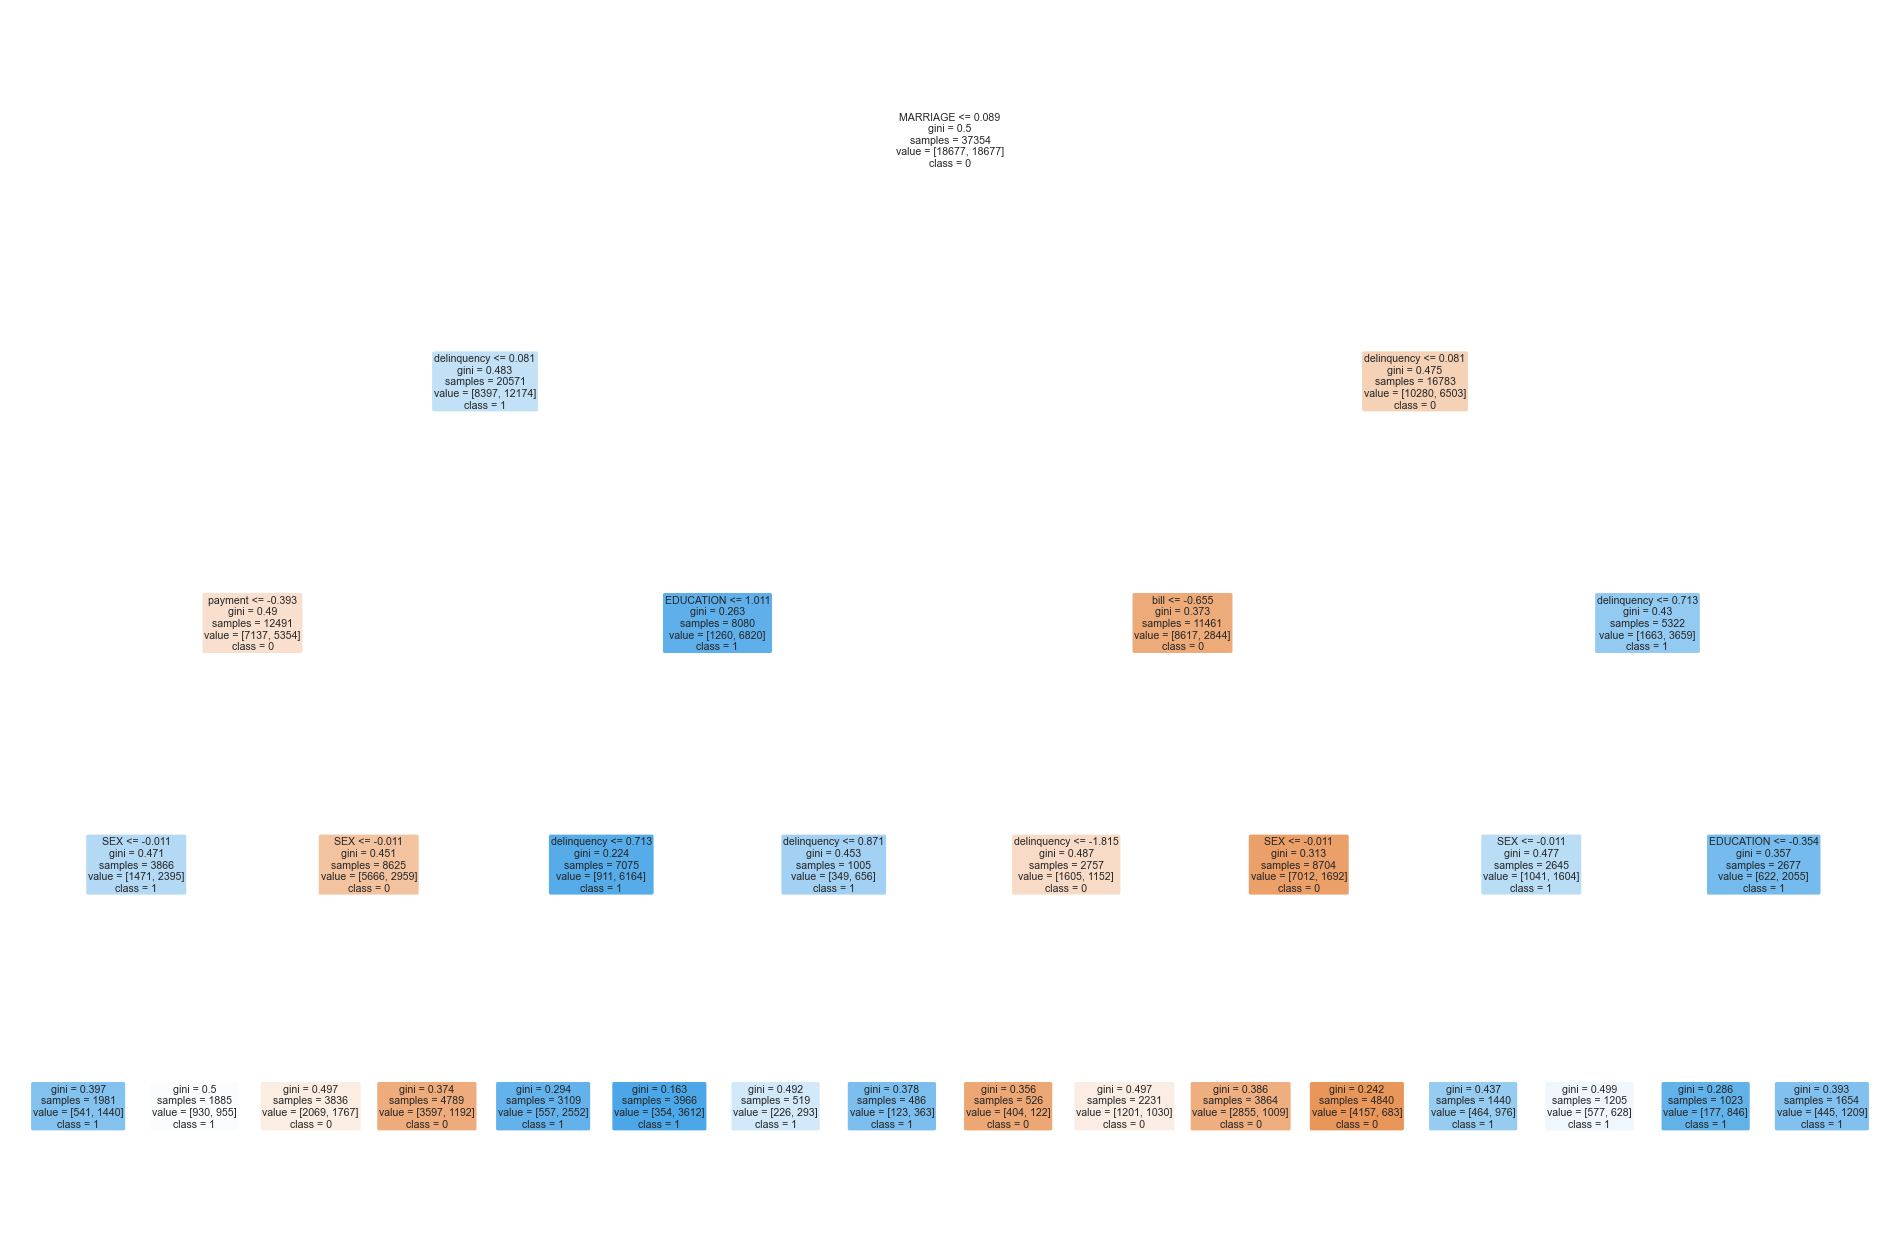

In [60]:
plt.figure(figsize=(12,8) ,dpi=200)
tree.plot_tree(grid_tree.best_estimator_[1],  
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
#plt.savefig('images/tree.jpg')
plt.show()

### Random Forest

#### Pros
- Random forest can solve classification and regression problems,  and does a decent estimation at both fronts.
- Random forest have the power of handle large data sets with higher dimensionality. It can handle thousands of input variables and identity most significant variables.

#### Cons
- In the case of regression, it doesn't predict beyond the range in the training data, and that they may over fit data sets that are particularly noisy.
- Very black box model with not much area to interpret whats going on

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
pipe = Pipeline([('ss', StandardScaler()), ('rf', RandomForestClassifier())])

param_grid = {'rf__n_estimators': [100],
              'rf__criterion': ['gini', "entropy"],    
              'rf__max_depth': [4, 6, 8],
              'rf__max_features': [3, 4, 7],
              'rf__min_samples_split': [2, 5, 10],
              'rf__min_samples_leaf': [1, 3, 6]}

grid_rf = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_rf.fit(X_train, y_train)

train_pred_rf = grid_rf.predict(X_train)
test_pred_rf = grid_rf.predict(X_test)

In [68]:
# metric evaluation
train_accu_rf = accuracy_score(y_train, train_pred_rf)
test_accu_rf = accuracy_score(y_test, test_pred_rf)
print('Training accuracy score: {}'.format(train_accu_rf))
print('Test accuracy score: {}'.format(test_accu_rf))

train_f1_rf = f1_score(y_train, train_pred_rf)
test_f1_rf = f1_score(y_test, test_pred_rf)
print('Training F1 score: {}'.format(train_f1_rf))
print('Test F1 score: {}'.format(test_f1_rf))

print(classification_report(y_test, test_pred_rf))

Training accuracy score: 0.781951062804519
Test accuracy score: 0.7466666666666667
Training F1 score: 0.77752588019994
Test F1 score: 0.5125080179602309
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4687
           1       0.44      0.61      0.51      1313

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000



### XGBoost

#### Pros
- The prediction capability is efficient through the use of its clone methods, such as bagging or random forest, and decision trees. Boosting is a resilient method that curbs over-fitting easily.

#### Cons
- One disadvantage of boosting is that it is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors. Thus, the method is too dependent on outliers.

In [61]:
from xgboost import XGBClassifier

In [65]:
pipe = Pipeline([('ss', StandardScaler()), ('xgb', XGBClassifier())])

param_grid = {
              'xgb__n_estimators': [100],
              'xgb__criterion': ['gini', "entropy"],    
              'xgb__max_depth': [4, 6, 8],
              'xgb__max_features': [3, 4, 7],
              'xgb__min_samples_split': [2, 5, 10],
              'xgb__min_samples_leaf': [1, 3, 6],              
#               'xgb__learning_rate': [0.2],
#               'xgb__min_child_weight': [1, 2],
#               'xgb__subsample': [0.5]
             }

grid_xgb = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

train_pred_xgb = grid_xgb.predict(X_train)
test_pred_xgb = grid_xgb.predict(X_test)

In [64]:
# metric evaluation
train_accu_xgb = accuracy_score(y_train, train_pred_xgb)
test_accu_xgb = accuracy_score(y_test, test_pred_xgb)
print('Training accuracy score: {}'.format(train_accu_xgb))
print('Test accuracy score: {}'.format(test_accu_xgb))

train_f1_xgb = f1_score(y_train, train_pred_xgb)
test_f1_xgb = f1_score(y_test, test_pred_xgb)
print('Training F1 score: {}'.format(train_f1_xgb))
print('Test F1 score: {}'.format(test_f1_xgb))

print(classification_report(y_test, test_pred_xgb))

Training accuracy score: 0.766986132676554
Test accuracy score: 0.743
Training F1 score: 0.7637350705754615
Test F1 score: 0.5120253164556962
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4687
           1       0.44      0.62      0.51      1313

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.76      6000



## Conclusion

1. The feature SEX and EDUCATION have different probability of default payment, according to both the statistical test and model evaluation, which means male/famle and different education levels have strong effects to the results.
2. Both continuous variable and categorical variables play important roles in the modeling. Different models mark different strong predictors.
3. The credit card default payment problem have highly imbalaced data. Even the data is processed with SMOTE technique, some metrics still does not show satisfactory reuslts. Because the real probability of default is unknown, we may implement artificial neural network to accurately estimate the real probability of default.